In [44]:
# Basics
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches

# Modeling
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error 

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [45]:
# load in zillow home price data as df
df = pd.read_csv('data/zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [46]:
df['Metro'].value_counts()

New York                              779
Los Angeles-Long Beach-Anaheim        347
Chicago                               325
Philadelphia                          281
Washington                            249
Boston                                246
Dallas-Fort Worth                     217
Minneapolis-St Paul                   201
Houston                               187
Pittsburgh                            177
Miami-Fort Lauderdale                 162
Portland                              161
Detroit                               153
Atlanta                               152
Seattle                               141
St. Louis                             140
San Francisco                         134
Kansas City                           127
Phoenix                               126
Baltimore                             122
Tampa                                 118
Riverside                             116
Cincinnati                            109
Denver                            

In [47]:
#Dataframe containing only zips from San Antonio metro

sa_df = df[df['Metro']=='San Antonio']
sa_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
31,92271,78130,New Braunfels,TX,San Antonio,Comal,32,123900.0,123900.0,123800.0,...,208300,209600,211300,212800,214300,215500,216000,217200,219500,221100
71,92341,78245,San Antonio,TX,San Antonio,Bexar,72,89200.0,89100.0,88900.0,...,159800,160700,161700,162700,163600,164600,165700,166800,167500,167700
113,92336,78240,San Antonio,TX,San Antonio,Bexar,114,100900.0,100800.0,100700.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
342,92345,78249,San Antonio,TX,San Antonio,Bexar,343,117900.0,117800.0,117800.0,...,198000,198400,198700,199100,199700,200300,201000,202400,204100,205000
431,92347,78251,San Antonio,TX,San Antonio,Bexar,432,105000.0,104600.0,104200.0,...,179500,180200,181200,182200,182600,182600,182800,183400,183900,184000
511,92350,78254,San Antonio,TX,San Antonio,Bexar,512,118200.0,118100.0,118000.0,...,200700,200900,201300,201800,202300,203200,203900,204600,205700,206400
533,92305,78209,San Antonio,TX,San Antonio,Bexar,534,239600.0,239400.0,239100.0,...,389300,391000,394300,396700,397300,397800,399300,401700,403200,402500
636,92324,78228,San Antonio,TX,San Antonio,Bexar,637,59400.0,59400.0,59400.0,...,115700,117100,118400,118900,118900,119600,120800,122200,123700,124800
639,92319,78223,San Antonio,TX,San Antonio,Bexar,640,57400.0,57400.0,57500.0,...,112600,113500,114100,114700,114900,115900,117500,118900,120500,122100
654,92326,78230,San Antonio,TX,San Antonio,Bexar,655,149400.0,149100.0,148900.0,...,259100,260600,261900,263400,264800,265500,266300,267800,269300,270000


In [48]:
sa_df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.00000,78.000000,78.000000
mean,92313.269231,78202.974359,4915.756410,118574.358974,118574.358974,118598.717949,118637.179487,118705.128205,118792.307692,118919.230769,...,209450.000000,210360.256410,211416.666667,212305.128205,212937.179487,213852.564103,214932.051282,216239.74359,217925.641026,219064.102564
std,69.915473,116.316739,3837.418925,67589.352954,67681.105645,67779.498286,67900.471679,68040.171285,68190.565233,68377.591943,...,106328.023148,106260.242091,106536.563343,106827.188885,106929.405173,107045.249231,107329.535633,107601.17358,107794.259823,107723.665205
min,92193.000000,78003.000000,32.000000,36100.000000,36100.000000,36200.000000,36200.000000,36300.000000,36400.000000,36500.000000,...,74800.000000,75700.000000,75900.000000,74600.000000,72500.000000,71300.000000,70700.000000,71200.00000,72600.000000,73700.000000
25%,92283.250000,78147.250000,1334.000000,62450.000000,62450.000000,62550.000000,62625.000000,62625.000000,62625.000000,62700.000000,...,128800.000000,131700.000000,132900.000000,132900.000000,132375.000000,132475.000000,133625.000000,135525.00000,137375.000000,138600.000000
50%,92316.500000,78220.500000,4422.500000,101400.000000,101350.000000,101300.000000,101200.000000,101100.000000,101050.000000,101000.000000,...,184050.000000,184700.000000,185350.000000,186100.000000,186550.000000,187050.000000,187850.000000,189000.00000,191550.000000,193050.000000
75%,92342.500000,78246.500000,7801.000000,154200.000000,154125.000000,154150.000000,154300.000000,154375.000000,154100.000000,153925.000000,...,265825.000000,266125.000000,266550.000000,267475.000000,268625.000000,270375.000000,272400.000000,274075.00000,277075.000000,282100.000000
max,92715.000000,78861.000000,14175.000000,404800.000000,406300.000000,407800.000000,409300.000000,410800.000000,412200.000000,413600.000000,...,599800.000000,600600.000000,602600.000000,606100.000000,608800.000000,611000.000000,613400.000000,614600.00000,614500.000000,612600.000000


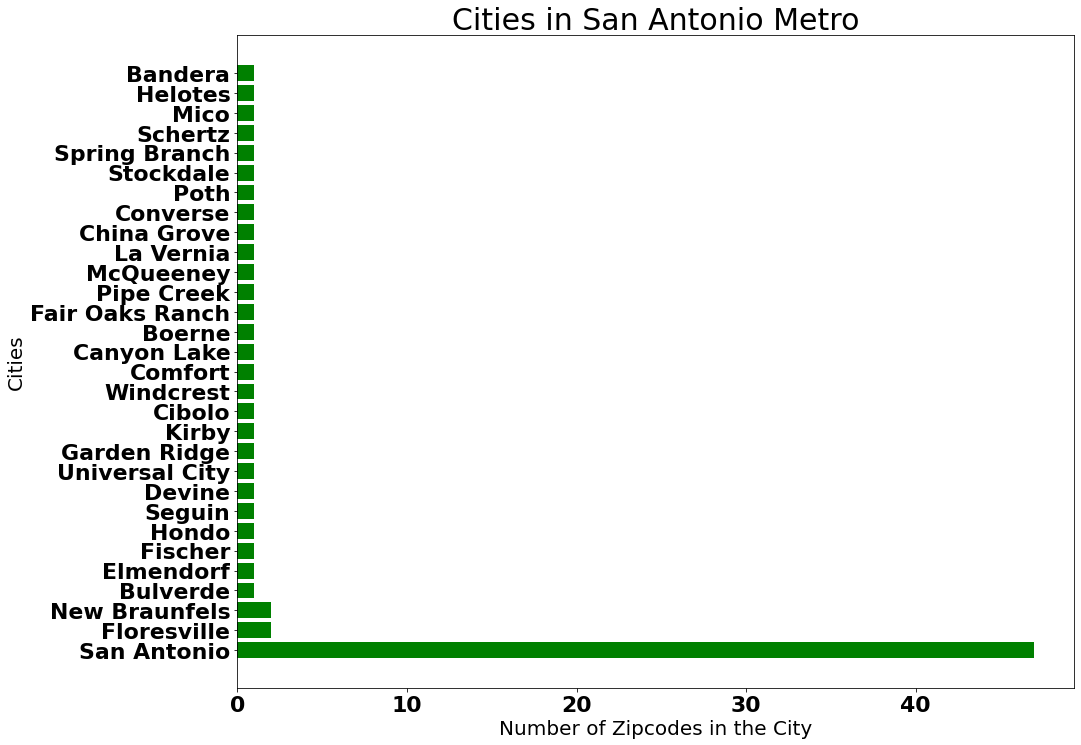

In [49]:
#Visualizing the value counts of zipcodes in each city in the San Antonio metro area


fig, ax = plt.subplots(figsize=(15,12))

y = [a for a in sa_df['City'].value_counts()]

x = [a for a in sa_df['City'].value_counts().keys()]

ax.barh(x,y,color='green')
ax.set_title('Cities in San Antonio Metro',fontsize=30)
ax.set_ylabel('Cities',fontsize=20)
ax.set_xlabel('Number of Zipcodes in the City',fontsize=20);

# Step 2: Data Preprocessing

In [62]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
   as datetime objects.
   NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [52]:

#satx_df = sa_df.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis ='columns')
#satx_df

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
31,78130,123900.0,123900.0,123800.0,123800.0,123800.0,123800.0,123900.0,124000.0,124200.0,...,208300,209600,211300,212800,214300,215500,216000,217200,219500,221100
71,78245,89200.0,89100.0,88900.0,88800.0,88800.0,88700.0,88700.0,88700.0,88800.0,...,159800,160700,161700,162700,163600,164600,165700,166800,167500,167700
113,78240,100900.0,100800.0,100700.0,100600.0,100500.0,100500.0,100400.0,100400.0,100400.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
342,78249,117900.0,117800.0,117800.0,117900.0,117900.0,118000.0,118100.0,118200.0,118400.0,...,198000,198400,198700,199100,199700,200300,201000,202400,204100,205000
431,78251,105000.0,104600.0,104200.0,103900.0,103600.0,103300.0,103200.0,103200.0,103100.0,...,179500,180200,181200,182200,182600,182600,182800,183400,183900,184000
511,78254,118200.0,118100.0,118000.0,118000.0,118000.0,118100.0,118200.0,118300.0,118400.0,...,200700,200900,201300,201800,202300,203200,203900,204600,205700,206400
533,78209,239600.0,239400.0,239100.0,238500.0,237900.0,237300.0,237000.0,237100.0,237700.0,...,389300,391000,394300,396700,397300,397800,399300,401700,403200,402500
636,78228,59400.0,59400.0,59400.0,59400.0,59500.0,59500.0,59600.0,59700.0,59800.0,...,115700,117100,118400,118900,118900,119600,120800,122200,123700,124800
639,78223,57400.0,57400.0,57500.0,57500.0,57500.0,57600.0,57700.0,57700.0,57800.0,...,112600,113500,114100,114700,114900,115900,117500,118900,120500,122100
654,78230,149400.0,149100.0,148900.0,148900.0,148900.0,149000.0,149200.0,149400.0,149700.0,...,259100,260600,261900,263400,264800,265500,266300,267800,269300,270000


DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

# Step 3: EDA and Visualization

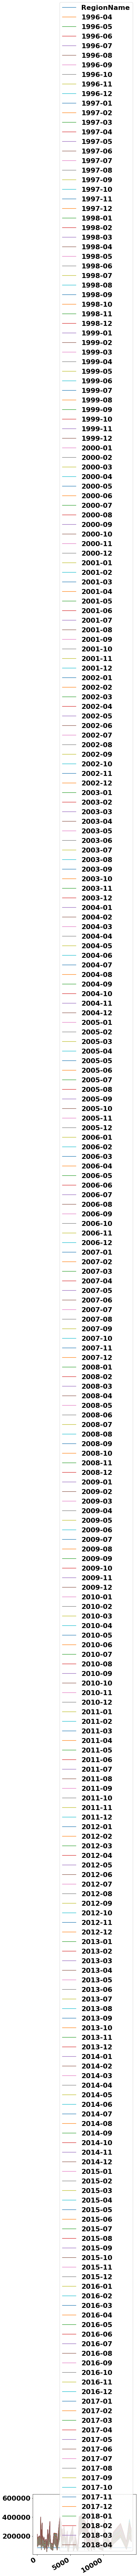

In [29]:
#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 22}

#matplotlib.rc('font', **font)

#sa_df.plot()
#plt.gcf().autofmt_xdate()

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [66]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [71]:
# Get average of San Antonio metro zipcodes
satx_df_melted = melt_data(sa_df)
satx_df_melted.head()

,value
time,
1996-04-01,118574.358974
1996-05-01,118574.358974
1996-06-01,118598.717949
1996-07-01,118637.179487
1996-08-01,118705.128205


In [72]:
# Get average of all US zipcodes
df_melted = melt_data(df)
df_melted.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


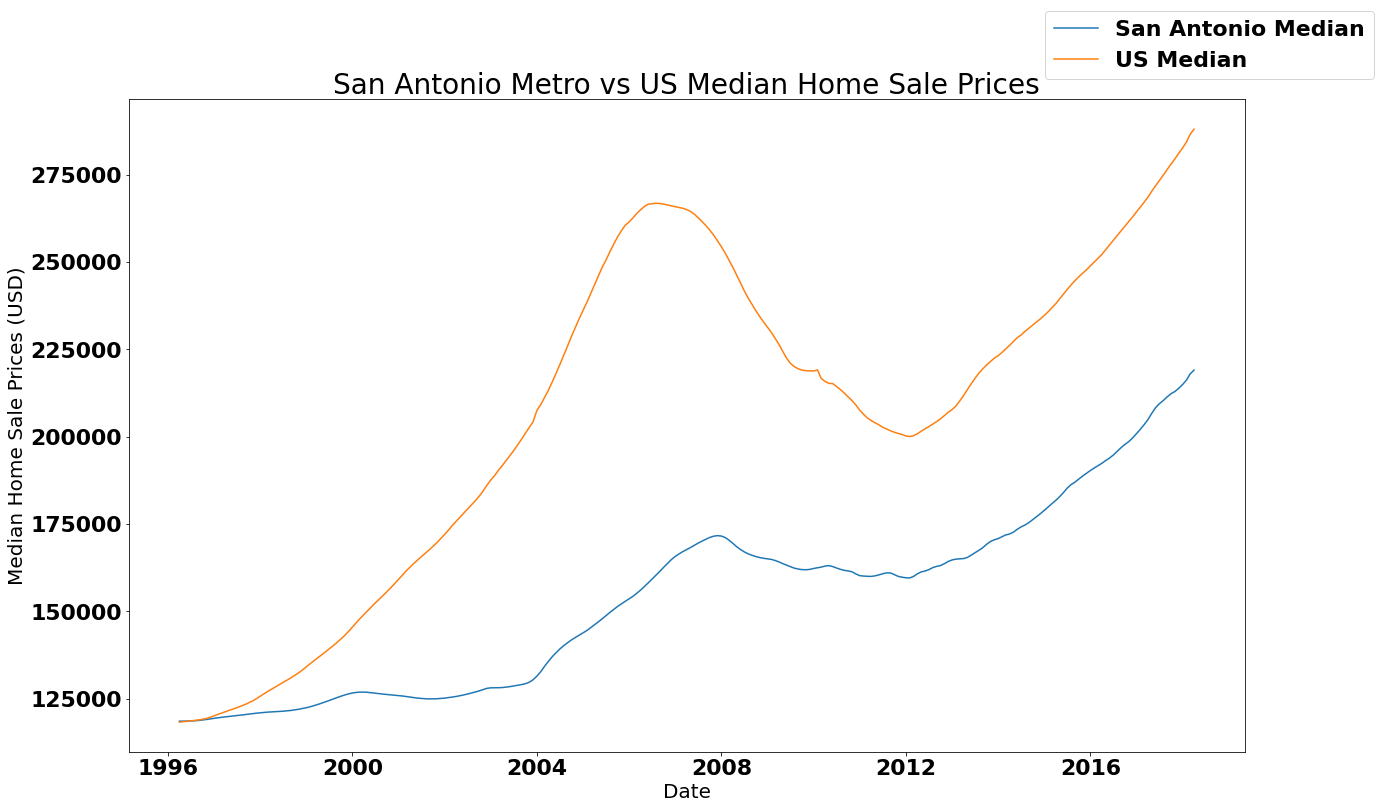

In [94]:
# Plot home value time series for all zip codes averaged

# Define figure
ax = plt.figure(figsize=(20,12))

# Plot
plt.plot(satx_df_melted, label = 'San Antonio Median')
plt.plot(df_melted, label = 'US Median')

# Title, x & y labels
plt.title('San Antonio Metro vs US Median Home Sale Prices', fontsize=28)
plt.ylabel('Median Home Sale Prices (USD)', fontsize=20)
plt.xlabel('Date', fontsize=20)
ax.legend(loc='upper right')

plt.show()

In [55]:
#Create dataframe for new melted data
def melt_df(df):
    merged = []
    for zipcode in df.RegionName:
        melted = melt_data(df.loc[df['RegionName'] == zipcode])
        row = df.loc[df['RegionName'] == zipcode].iloc[:,:6]
        rows = pd.concat([row]*len(melted), ignore_index=True)
        merge = pd.concat([rows, melted.reset_index()], axis= 1)
        merged.append(merge)
    melted_df = pd.concat(merged)
    return melted_df

In [56]:
satx_df = melt_df(sa_df)

In [57]:
satx_df

,RegionID,RegionName,City,State,Metro,CountyName,time,value
0,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-04-01,123900.0
1,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-05-01,123900.0
2,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-06-01,123800.0
3,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-07-01,123800.0
4,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-08-01,123800.0
...,...,...,...,...,...,...,...,...
260,92561,78623,Fischer,TX,San Antonio,Comal,2017-12-01,260900.0
261,92561,78623,Fischer,TX,San Antonio,Comal,2018-01-01,262700.0
262,92561,78623,Fischer,TX,San Antonio,Comal,2018-02-01,267100.0
263,92561,78623,Fischer,TX,San Antonio,Comal,2018-03-01,276100.0


In [58]:
satx_df.set_index('time', inplace = True)
satx_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,value
time,,,,,,,
1996-04-01,92271,78130,New Braunfels,TX,San Antonio,Comal,123900.0
1996-05-01,92271,78130,New Braunfels,TX,San Antonio,Comal,123900.0
1996-06-01,92271,78130,New Braunfels,TX,San Antonio,Comal,123800.0
1996-07-01,92271,78130,New Braunfels,TX,San Antonio,Comal,123800.0
1996-08-01,92271,78130,New Braunfels,TX,San Antonio,Comal,123800.0


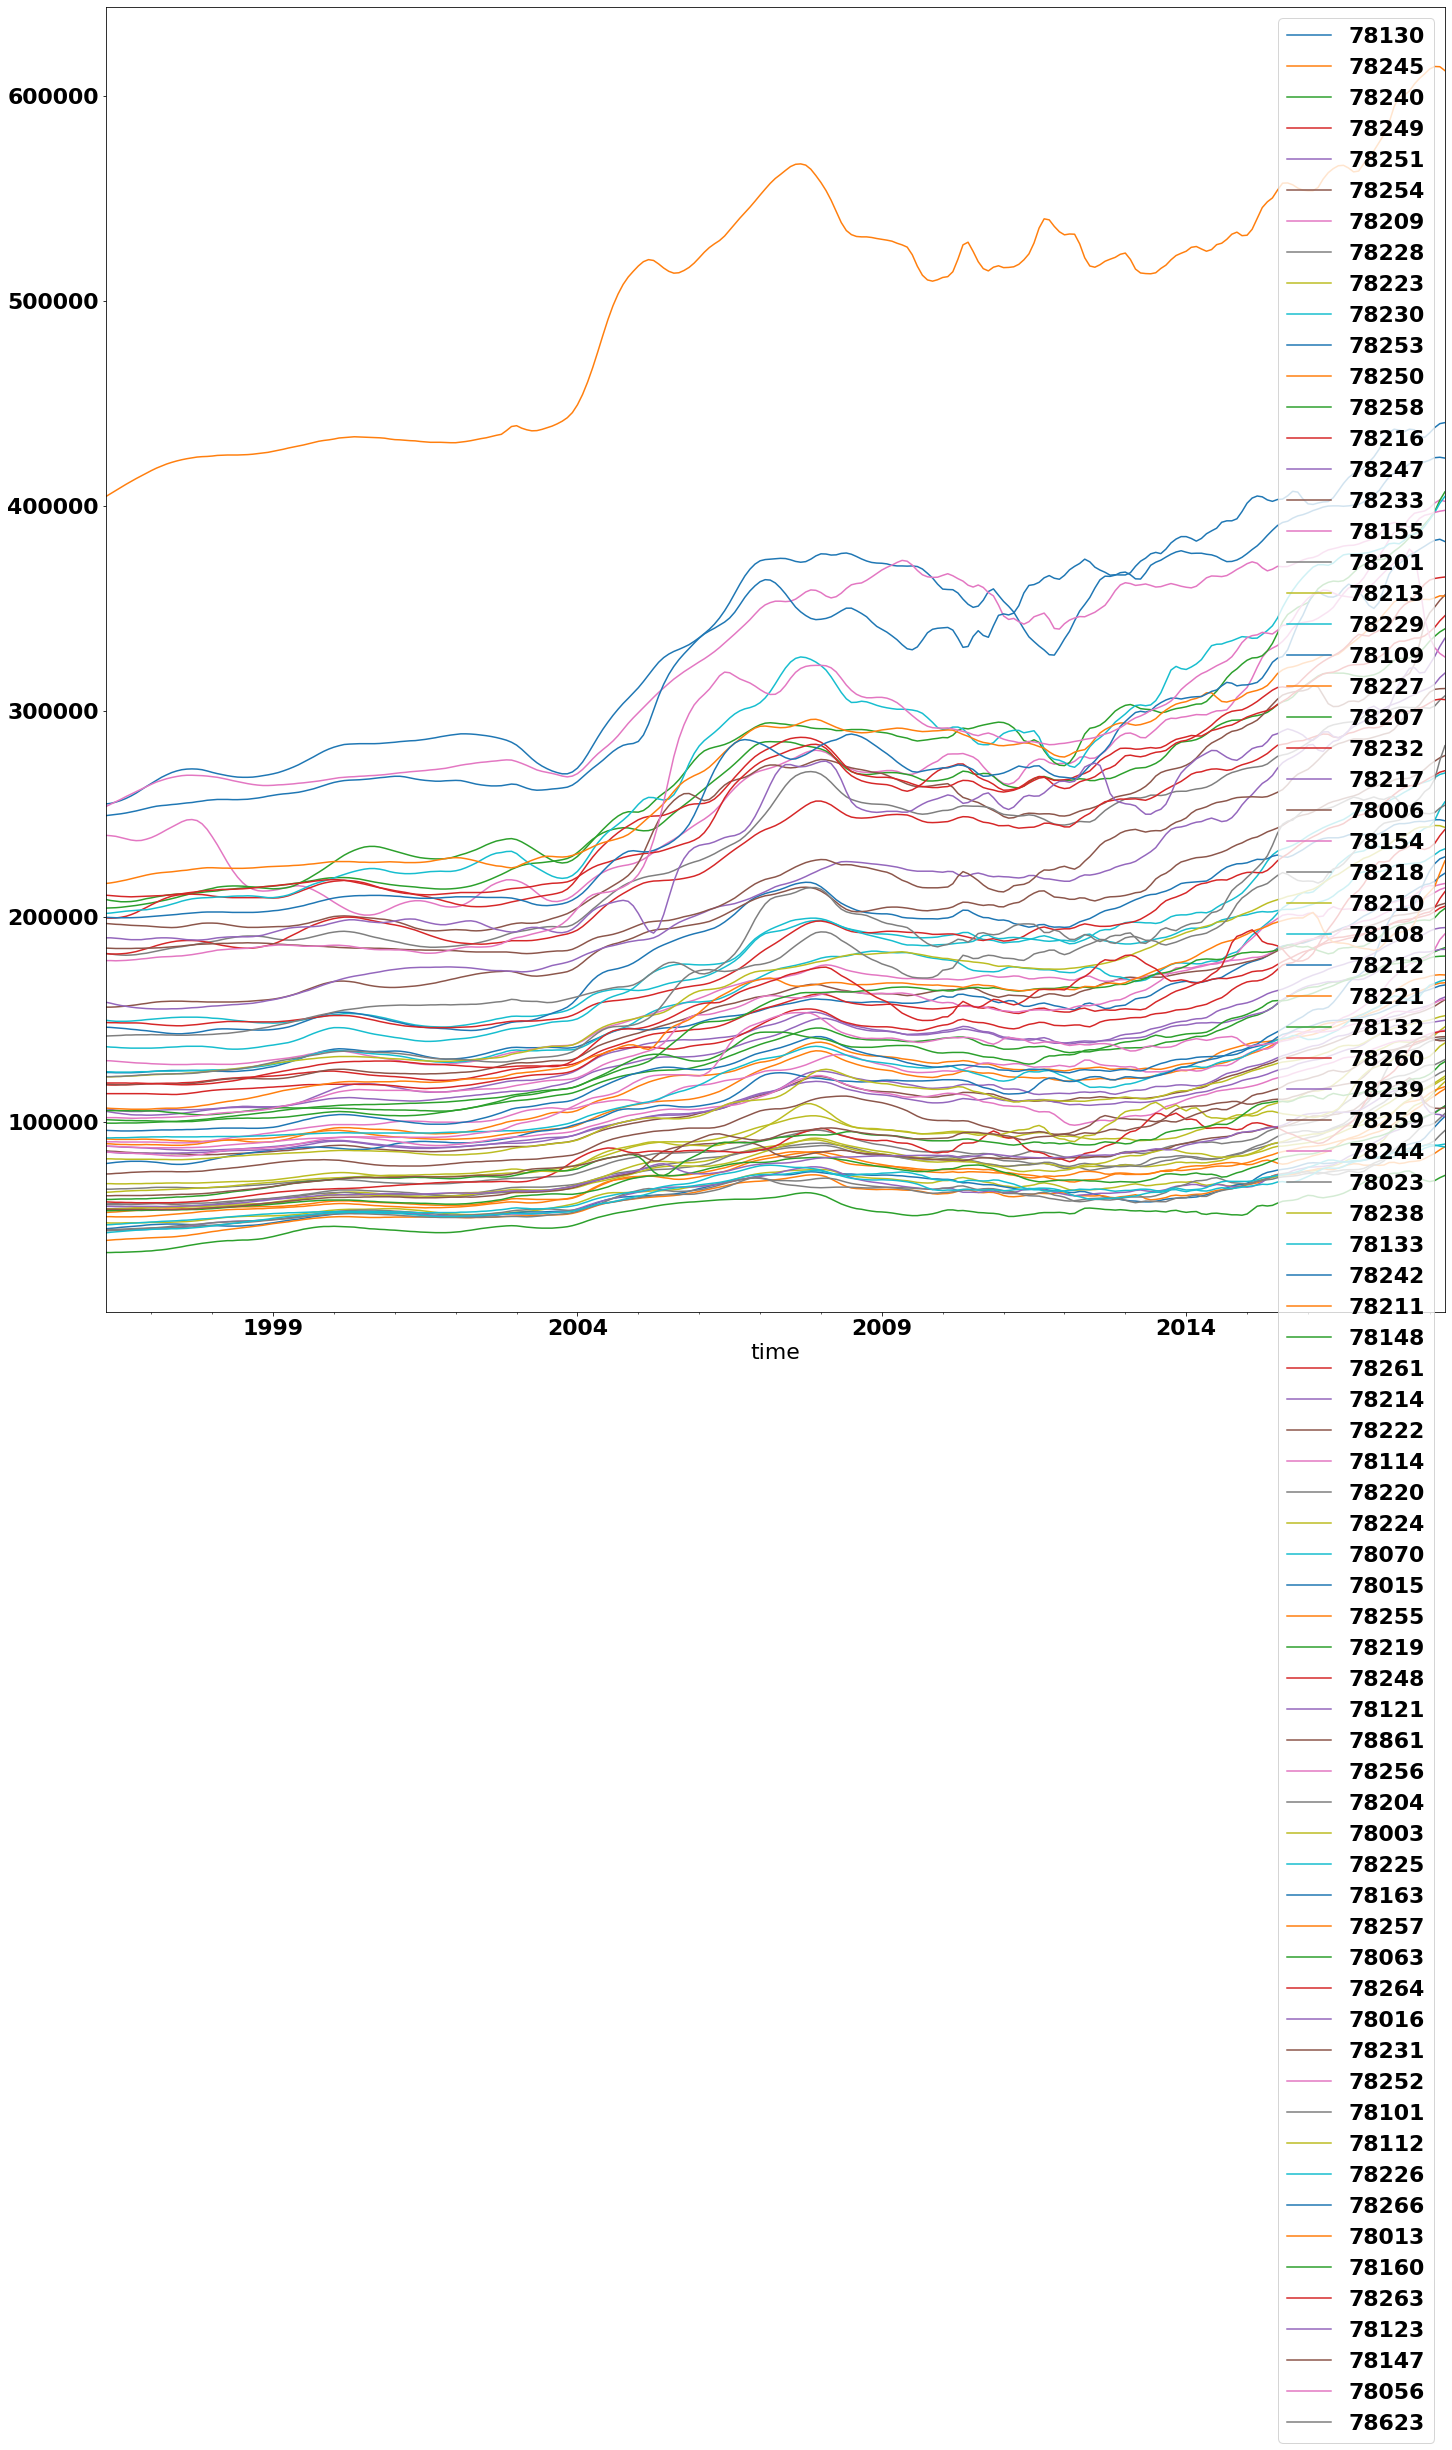

<Figure size 432x288 with 0 Axes>

In [99]:
#plot the values grouped by zipcode
plt.figure(figsize=(24,24))
for zipcode in satx_df.RegionName.unique():
    satx_df.loc[satx_df['RegionName'] == zipcode].value.plot(label=zipcode)
plt.legend()
plt.show()
plt.gcf().autofmt_xdate();

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results